# Lab 9 - Statistical Plots

## Purpose

Learn how to visualize distributions and relations between variables in a fast and scalable way.

## Tasks

We will analyze a dataset that contains the outcomes of more than 300,000 Kickstarter projects as of January, 2018. This dataset is sufficiently large to turn exploration in GUI tools, such as Excel and Tableau, cumbersome. We will learn how to generate charts programmatically in Python with Pandas, a popular data manipulation library, and Plotnine, a port of R's excellent ggplot. The workflow introduced here will be useful when you need to perform data wrangling and visualization iteratively on large data. It can help you quickly understand the behavior of the variables in your data and spot interesting subsets and structures before you start to sketch a custom visualization. Plus, any data transformations will remain documented in code.

### Install and import dependencies

Install [pandas](http://pandas.pydata.org/) and [plotnine](https://plotnine.readthedocs.io/en/stable/installation.html).


In [1]:
from plotnine import *
import pandas as pd

theme_update(dpi=200, figure_size=(10,4))

### Loading the data
Load the data and store it in the variable `KS`. `pandas.read_csv` returns a `pandas.DataFrame`, which is the fundamental data structure in Pandas. It is essentially an indexed table:

In [2]:
KS = pd.read_csv("ks-projects-201801.csv.xz",
                 infer_datetime_format=True,
                 encoding='latin')
KS

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


### Successful USD projects

There are six project states: failed, successful, canceled, undefined, live, and suspended. The examples in this section will focus on the successful projects with currency USD. First, filter the data. `DataFrame.query` accepts a string that should resolve to a conditional statement: 

In [3]:
USD = KS.query("currency == 'USD'")
Successful = USD.query("state == 'successful'")

Then use a histogram to visualize the distribution of raised funds (pledged):

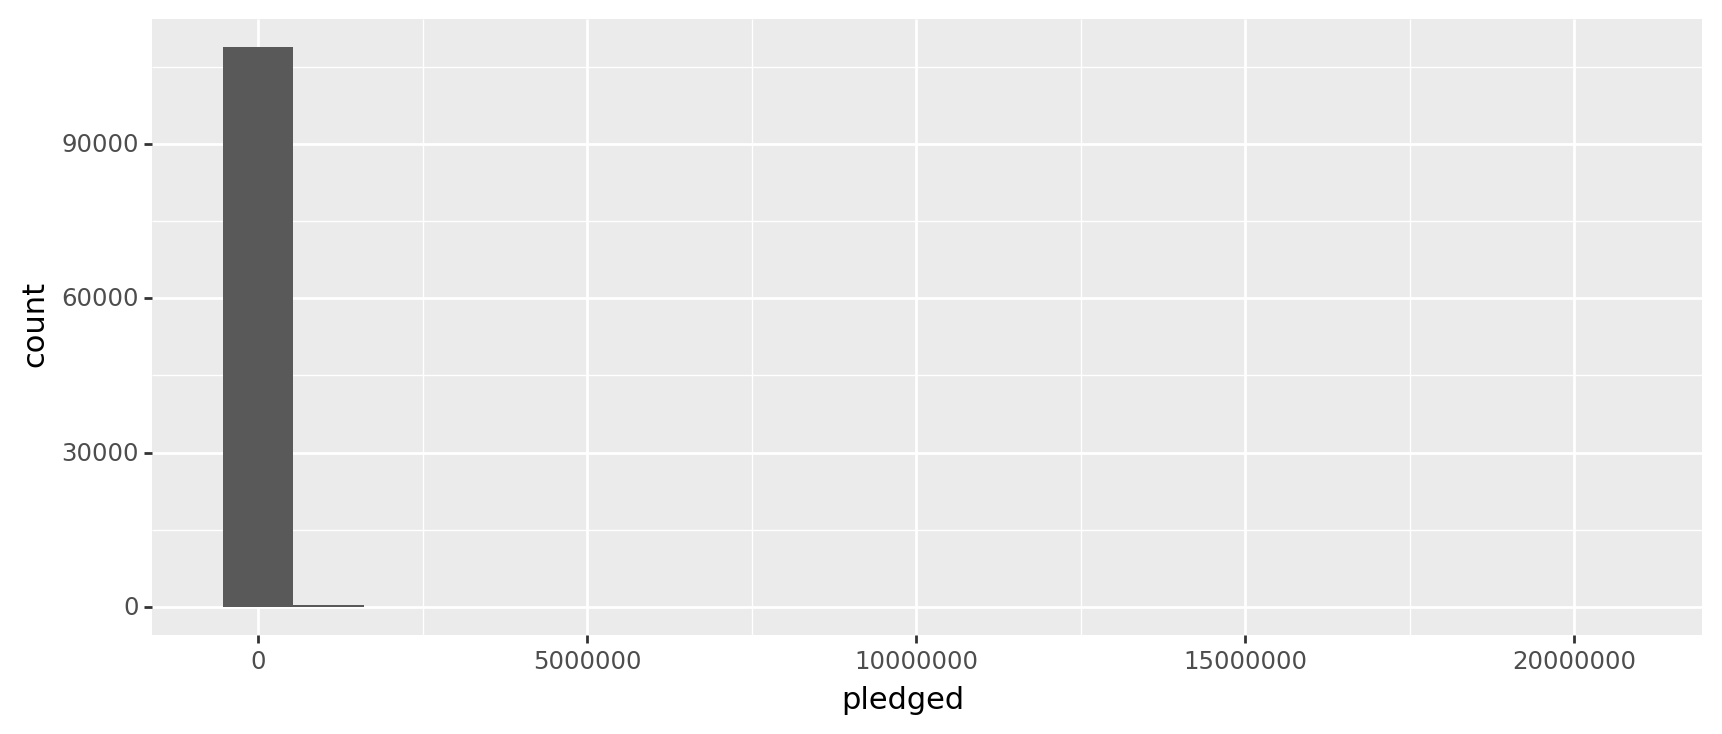

<ggplot: (8759462163609)>

In [4]:
ggplot(Successful, aes(x='pledged')) + geom_histogram(bins=20)

The first argument to ggplot is a DataFrame. The second is an aesthetics (aes) definition. Aesthetics is ggplot's name for visual mappings. Available arguments for aes are x, y, color, shape, alpha, among others.  The definition of this mapping is independent of which kind of plot is be used. The plot type is specified with a [geometry](http://ggplot2.tidyverse.org/reference/index.html#section-layer-geoms): geom_histogram(). Note how this geometry is "added" to the chart with the sum operator. Without a geometry, the chart would be empty. You can adjust the number of bins of the histogram to see the effects of different levels of aggregation.

The plot above shows that the distribution of pledges is extremely skewed. There are a few outliers that throw off our scale. We have learned that a log scale is more adequate in this case:

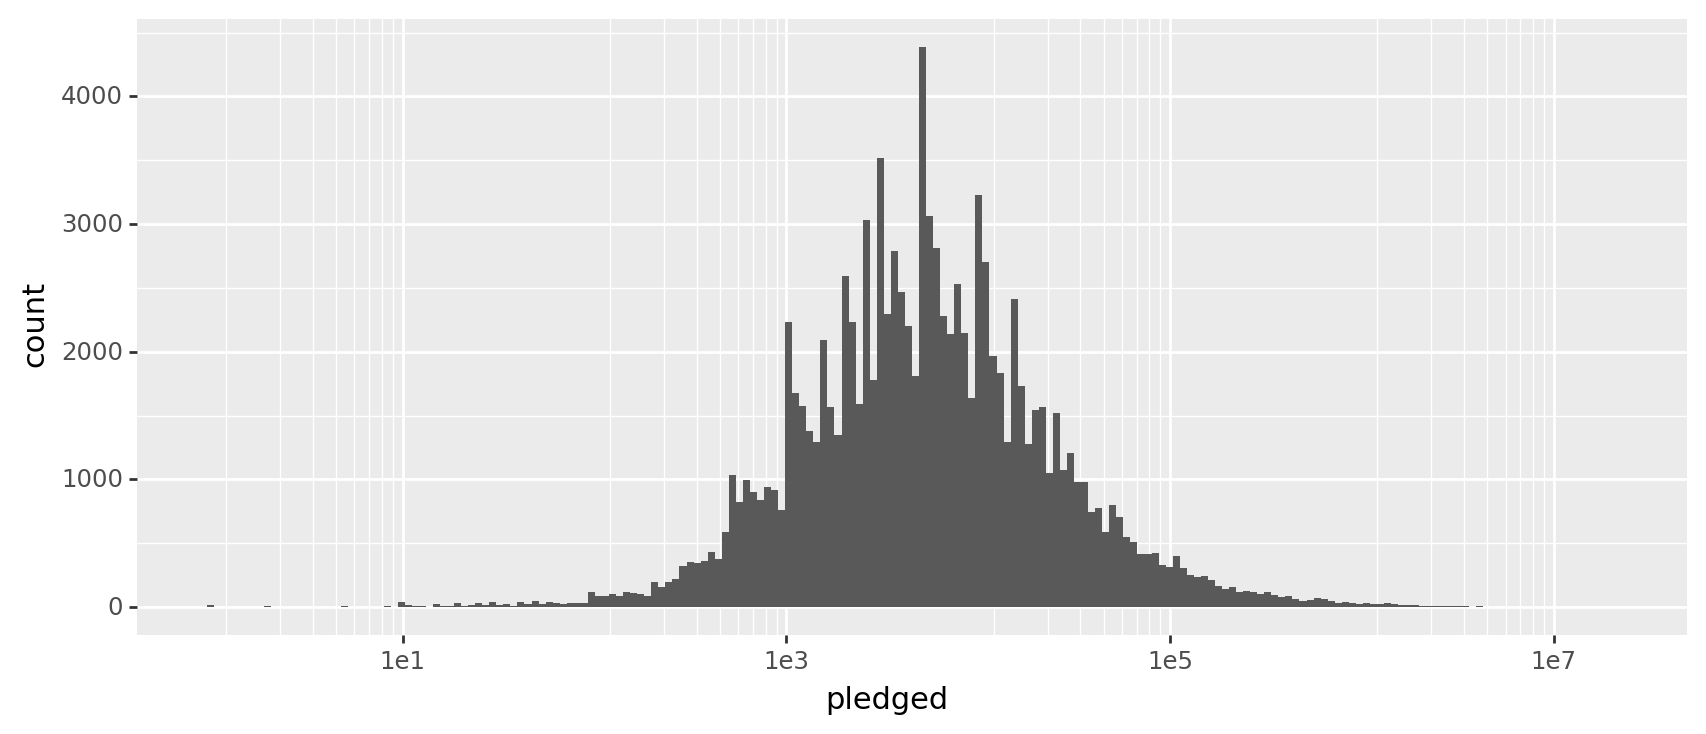

<ggplot: (8759459036661)>

In [18]:
ggplot(Successful, aes(x='pledged')) + geom_histogram(bins=200) + scale_x_log10()

We see that the mean sum raised for successful KickStarter projects is around 10^4 (USD 10,000).
Is this distribution different across project categories? Let's first see how many categories are in the data and how many projects are in each of them:

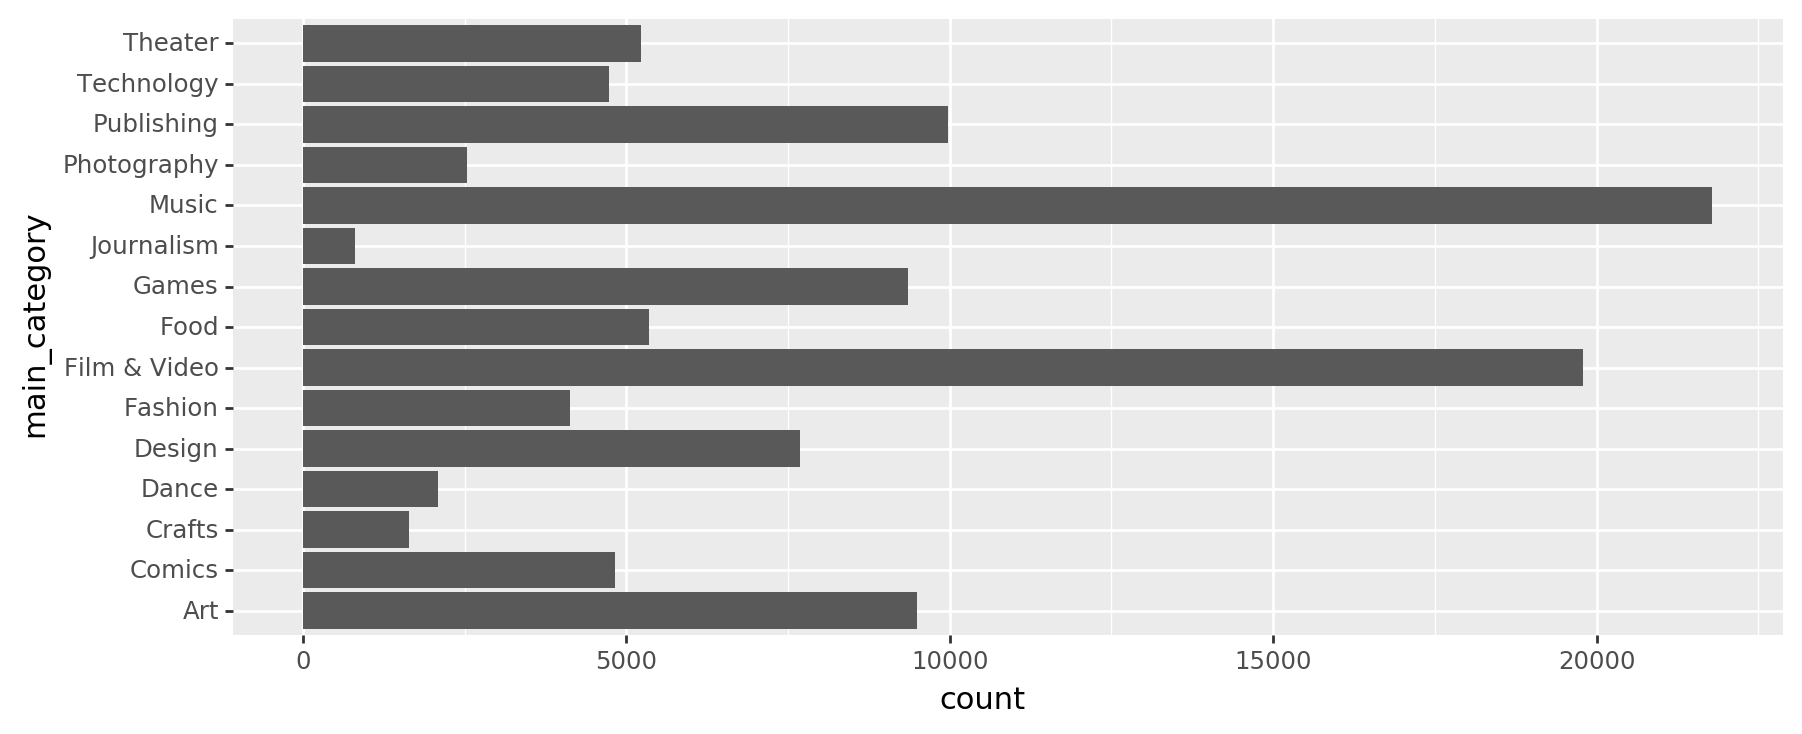

<ggplot: (8759458939321)>

In [19]:
ggplot(Successful, aes(x='main_category')) + geom_bar() + coord_flip()
# coord_flip() flips the coordinates (turn the chart horizontal)

Let's compare these categories in terms of their median pledged sum using boxplots, which also shows outliers and quantiles. Again, we apply a log transform.

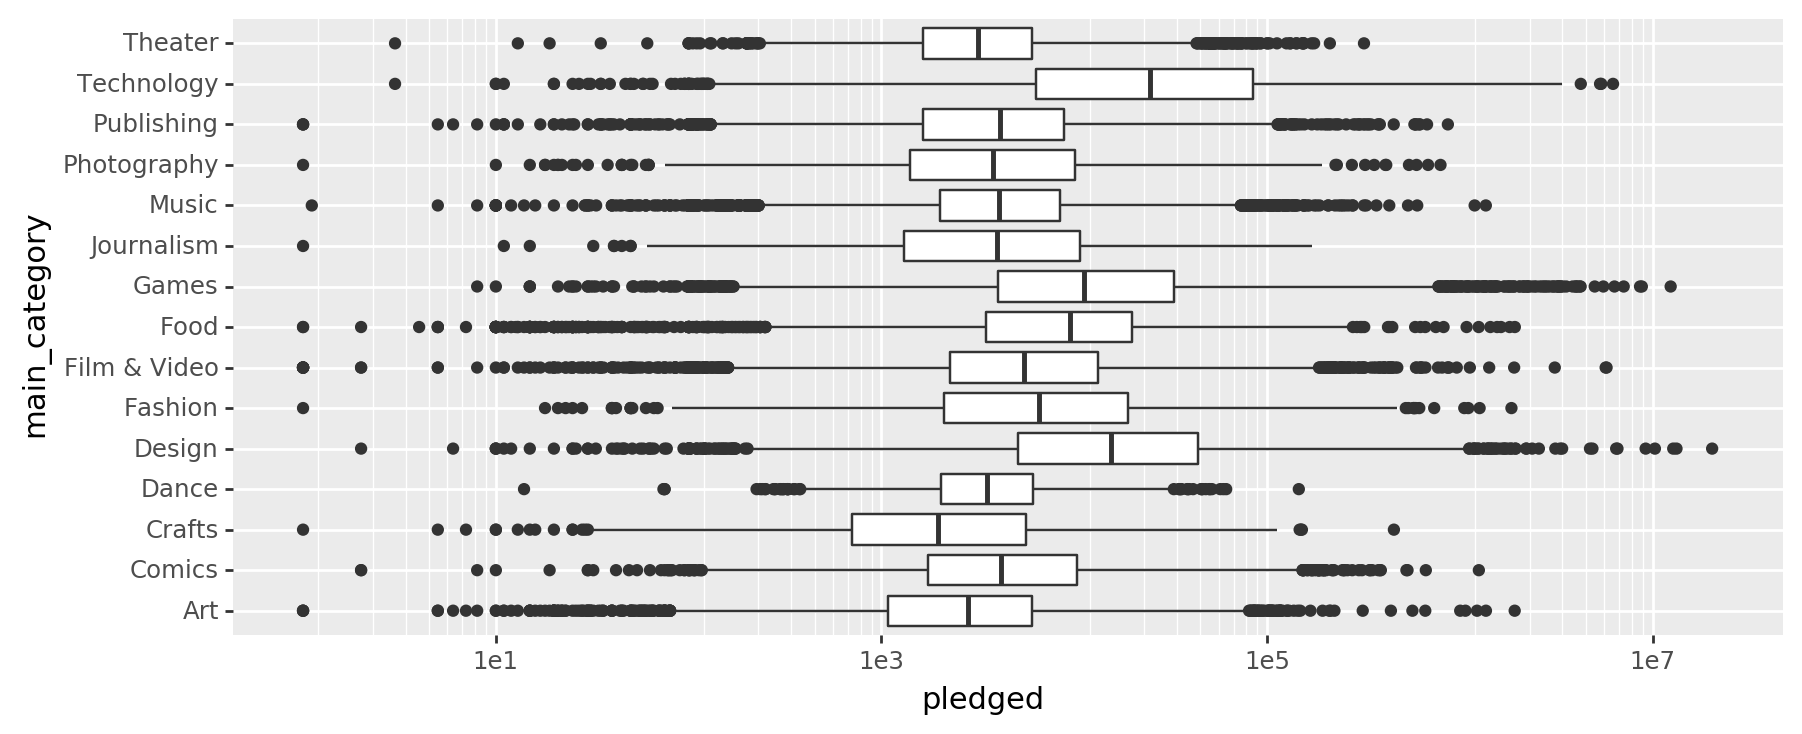

<ggplot: (8759458946865)>

In [20]:
ggplot(Successful, aes(x='main_category', y='pledged')) + geom_boxplot() + scale_y_log10() + coord_flip()

Here's how you read a boxplot (credit: [FlowingData](https://flowingdata.com/2008/02/15/how-to-read-and-use-a-box-and-whisker-plot/)). 

![](https://i1.wp.com/flowingdata.com/wp-content/uploads/2008/02/box-plot-explained.gif?zoom=2&w=1090)

Another way to compare these distributions is by placing one distributional chart for each category in a grid. This is done with the operator `facet_wrap`:

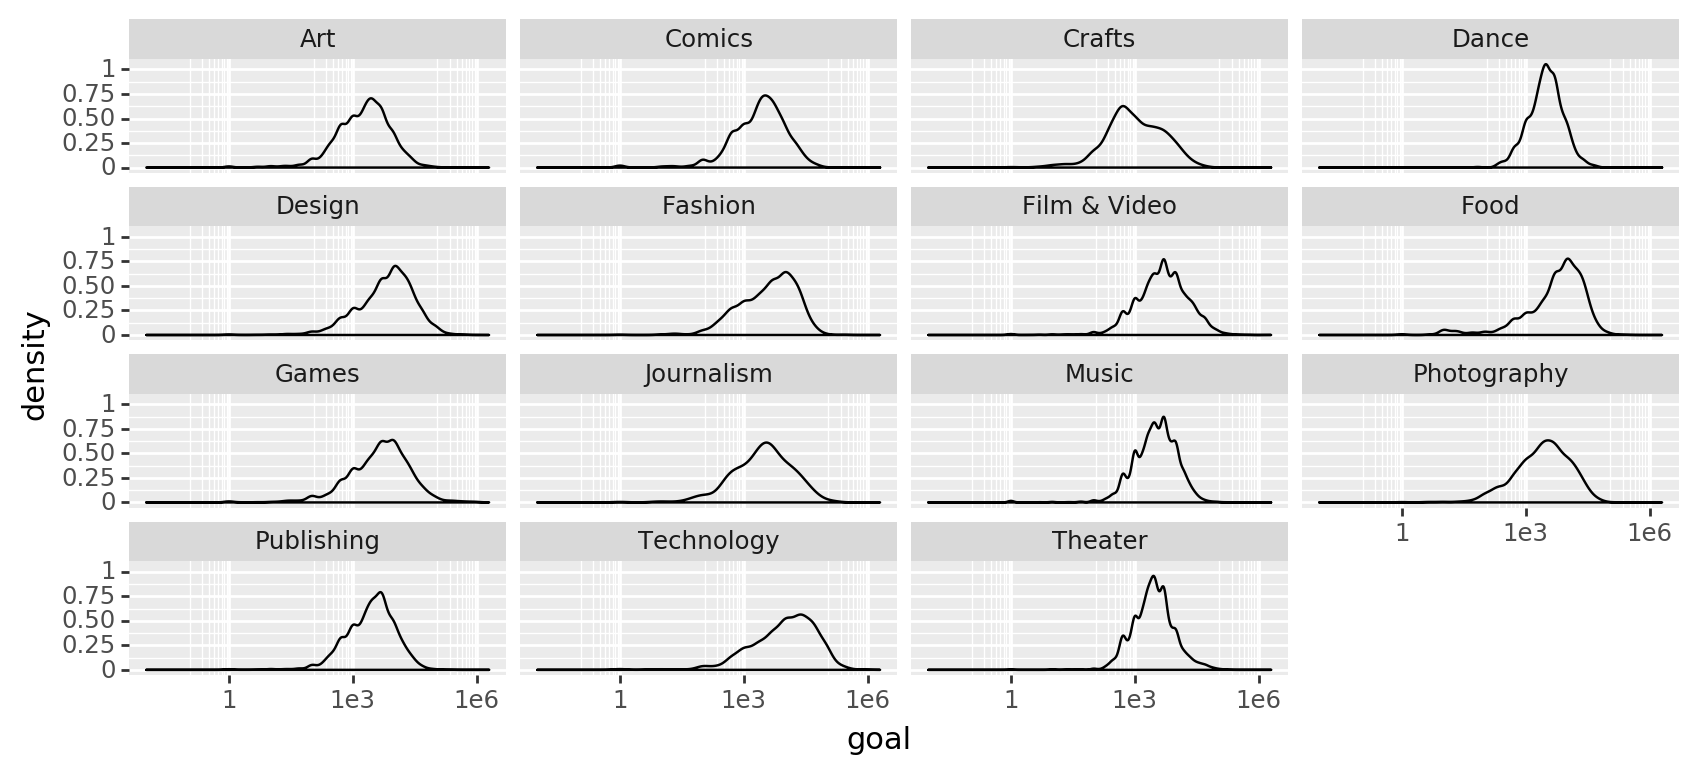

<ggplot: (8759460050037)>

In [21]:
ggplot(Successful, aes('goal')) + geom_density() + scale_x_log10() + facet_wrap('~main_category')

This time we went with a density plot (geom_density) to visualize the distribution of funding goals, instead of the raised money (`pledged`). A histogram (geom_histogram) would be just as good (or better).

### Comparing the category distributions of Canada and US

Let's select the US and CA points and calculate the percentage of projects in each main category in each country.

In [22]:
US_CA = KS.query("country == 'US' or country == 'CA'") # select US and Ca

# group by country and main category, count projects and turn counts into percentages
category_per_country = US_CA.groupby(['country', 'main_category']).size()
category_per_country = 100*category_per_country / category_per_country.groupby(level=0).sum()
category_per_country = pd.DataFrame(category_per_country, columns=['percentage']).reset_index()
category_per_country

,country,main_category,percentage
0,CA,Art,7.230957
1,CA,Comics,3.530767
2,CA,Crafts,2.886961
3,CA,Dance,0.637029
4,CA,Design,10.165356
5,CA,Fashion,7.183519
6,CA,Film & Video,11.541068
7,CA,Food,7.095419
8,CA,Games,12.767688
9,CA,Journalism,1.477365


Then plot this data with a nested bar chart.

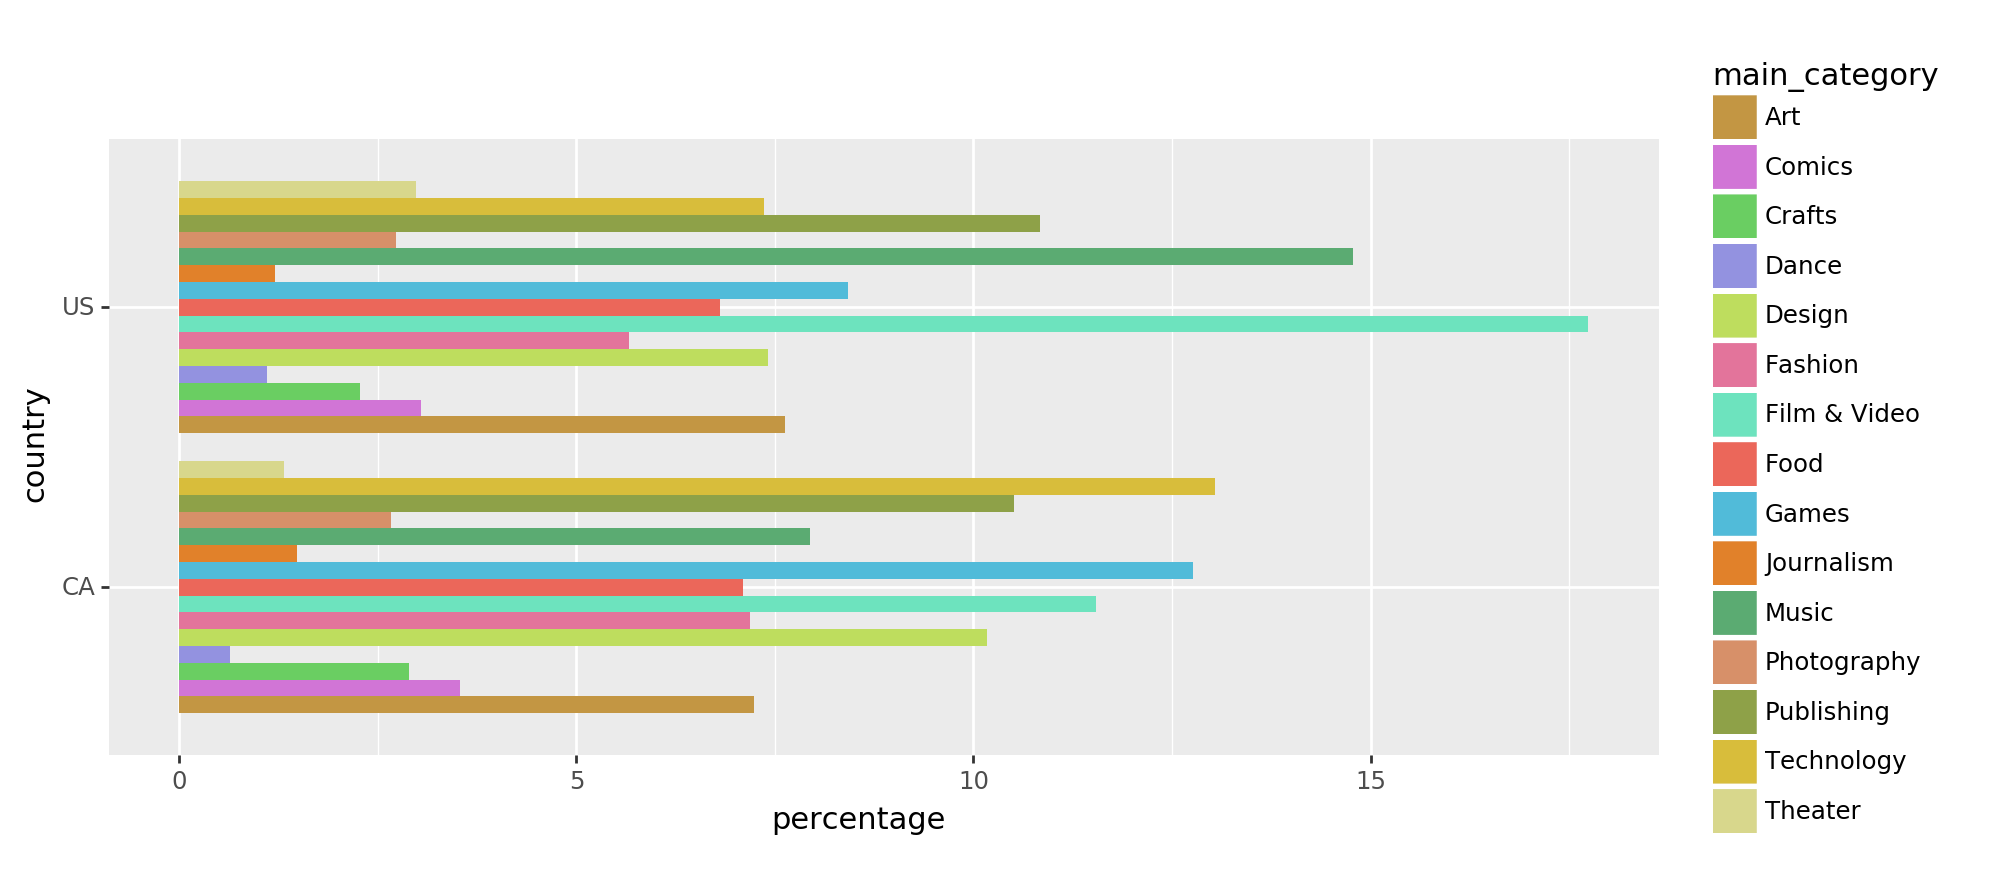

<ggplot: (8759460525833)>

In [23]:
(ggplot(category_per_country, aes(x='country')) 
 + geom_bar(aes(y='percentage', fill='main_category'), position="dodge", stat="identity")
 + coord_flip()
 + scale_fill_manual(["#c39643", "#d175d6", "#6ace62", "#9392e0", "#bedd5e", 
                      "#e3749b", "#6de3be", "#eb675a", "#51bbd9", "#e1812a", 
                      "#5bab72", "#d79069", "#8ea148", "#d8bd3b", "#d8d78c"])
)

In the chart above main category is nested within country. We accomplished this by setting the x aesthetic to country and the fill (color) aesthetic to main category. When ggplot sees that color is encoding a variable, it automatically splits the data into groups. `stat` is set to "identity" to prevent ggplot from aggregating the data, because we have already done so. When position is set to dodge geom_bar displays the group components side by side. Try removing that option to see a stacked bar chart, instead.

### Task 1. Analyze the subset of Canadian projects

Generate at least 3 different plots (boxplots, bar charts, density plots) that help you answer the following questions about the Canadian projects:


1. Is the distribution of project goals (target funding) similar between US and Canada?
2. How does the distribution of backers vary across main categories in Canada?
3. Are there noteworthy differences in the ratio successful/failed projects across main categories in Canada? Suggestion: Filter by country (CA) and state (successful and failed), group by main_category and state, and plot as a nested bar chart.

Write a paragraph summarizing your findings.


### Variable relations
In the previous section, we plotted univariate distributions. In this section, we will see how we can plot relations between variables. The dataset has two columns related to the type of project: category and main_category. We would like to explore category, which is more specific than main_category, but it has too many levels. Let's begin by reducing the data to the top 10 low-level categories. In these examples we are again working with the subset of successful projects with USD currency.

In [24]:
from collections import Counter
Top10Categories = Counter(Successful['category'].values).most_common(10)
print(Top10Categories)
Top10Categories = set(map(lambda x: x[0], Top10Categories))


[('Tabletop Games', 5981), ('Product Design', 5838), ('Music', 5819), ('Shorts', 5559), ('Documentary', 5164), ('Theater', 3891), ('Indie Rock', 3441), ('Rock', 3237), ('Food', 2999), ('Art', 2750)]


We filter by category so as to include projects in the top 10, and plot pledged against goal in scatterplots. If we add `facet_wrap('~category')` ggplot splits into multiple charts, one for every value of category. Experiment wih deleting this call.

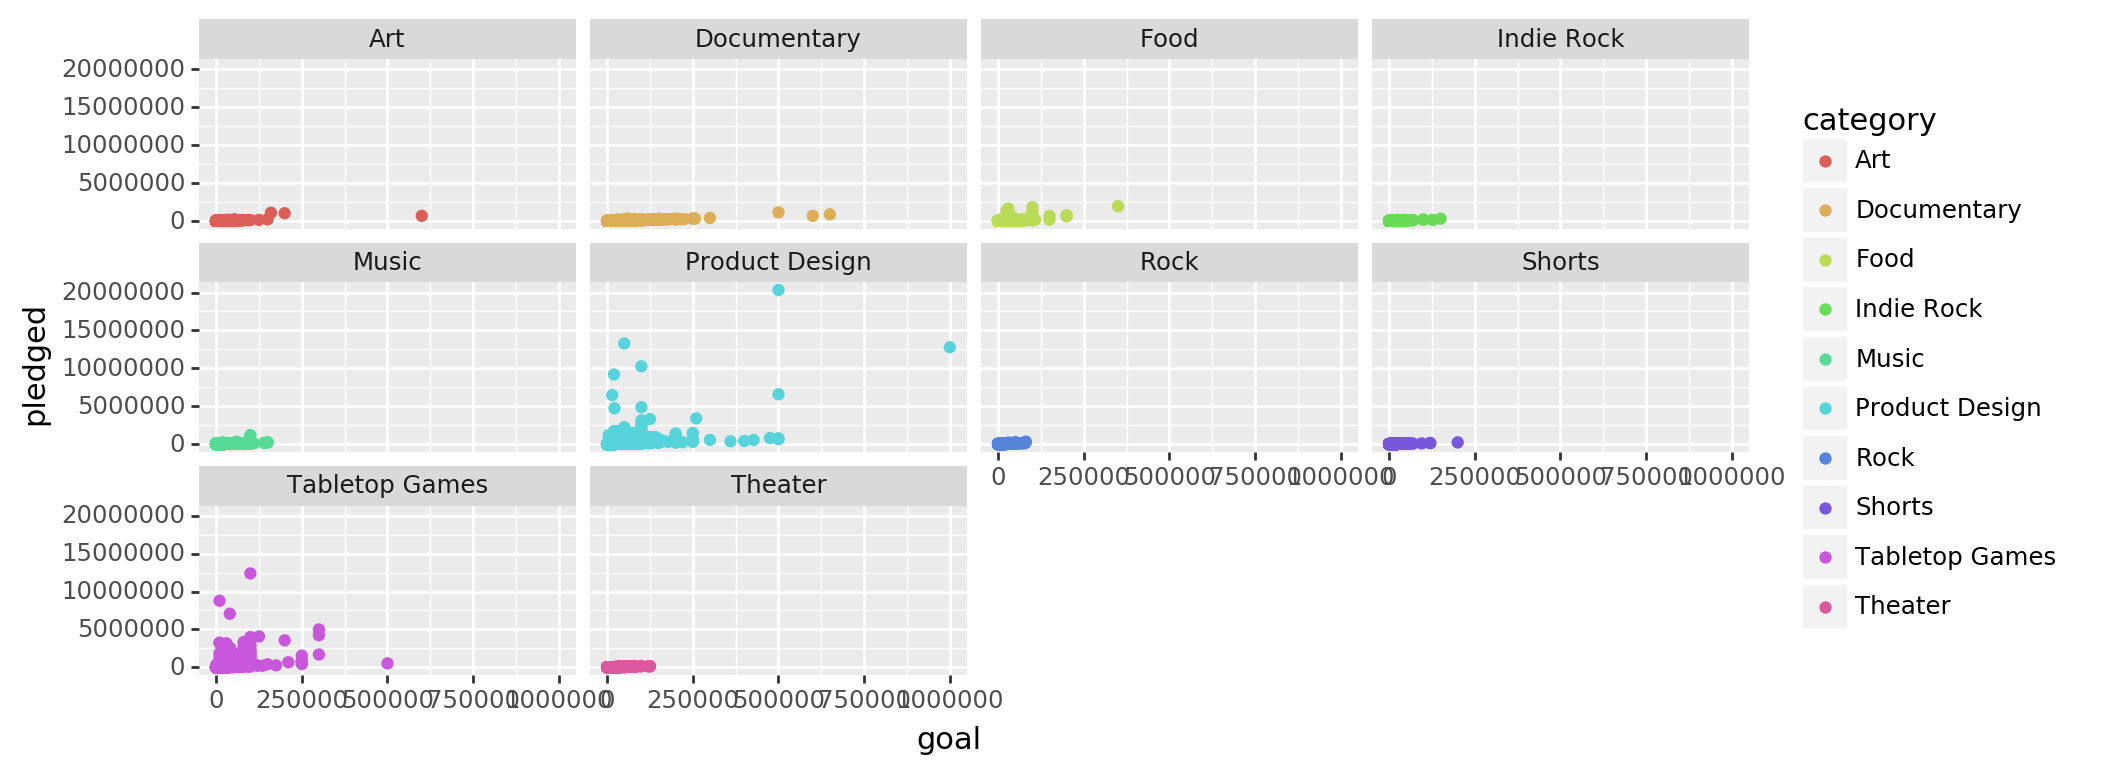

<ggplot: (8759458871601)>

In [25]:
(ggplot(Successful.query("category in @Top10Categories"), # the prefix @ tells pandas that what follows is a variable
       aes(x='goal', y='pledged', color='category')) +
    geom_point() + facet_wrap('~category')
)

Product Design products has serious oultliers when it comes to asking and getting large sums of money. This ruins the visualization for all other categories. To make things more comparable, let's apply log transformations on both axes and set a lower alpha for the points:

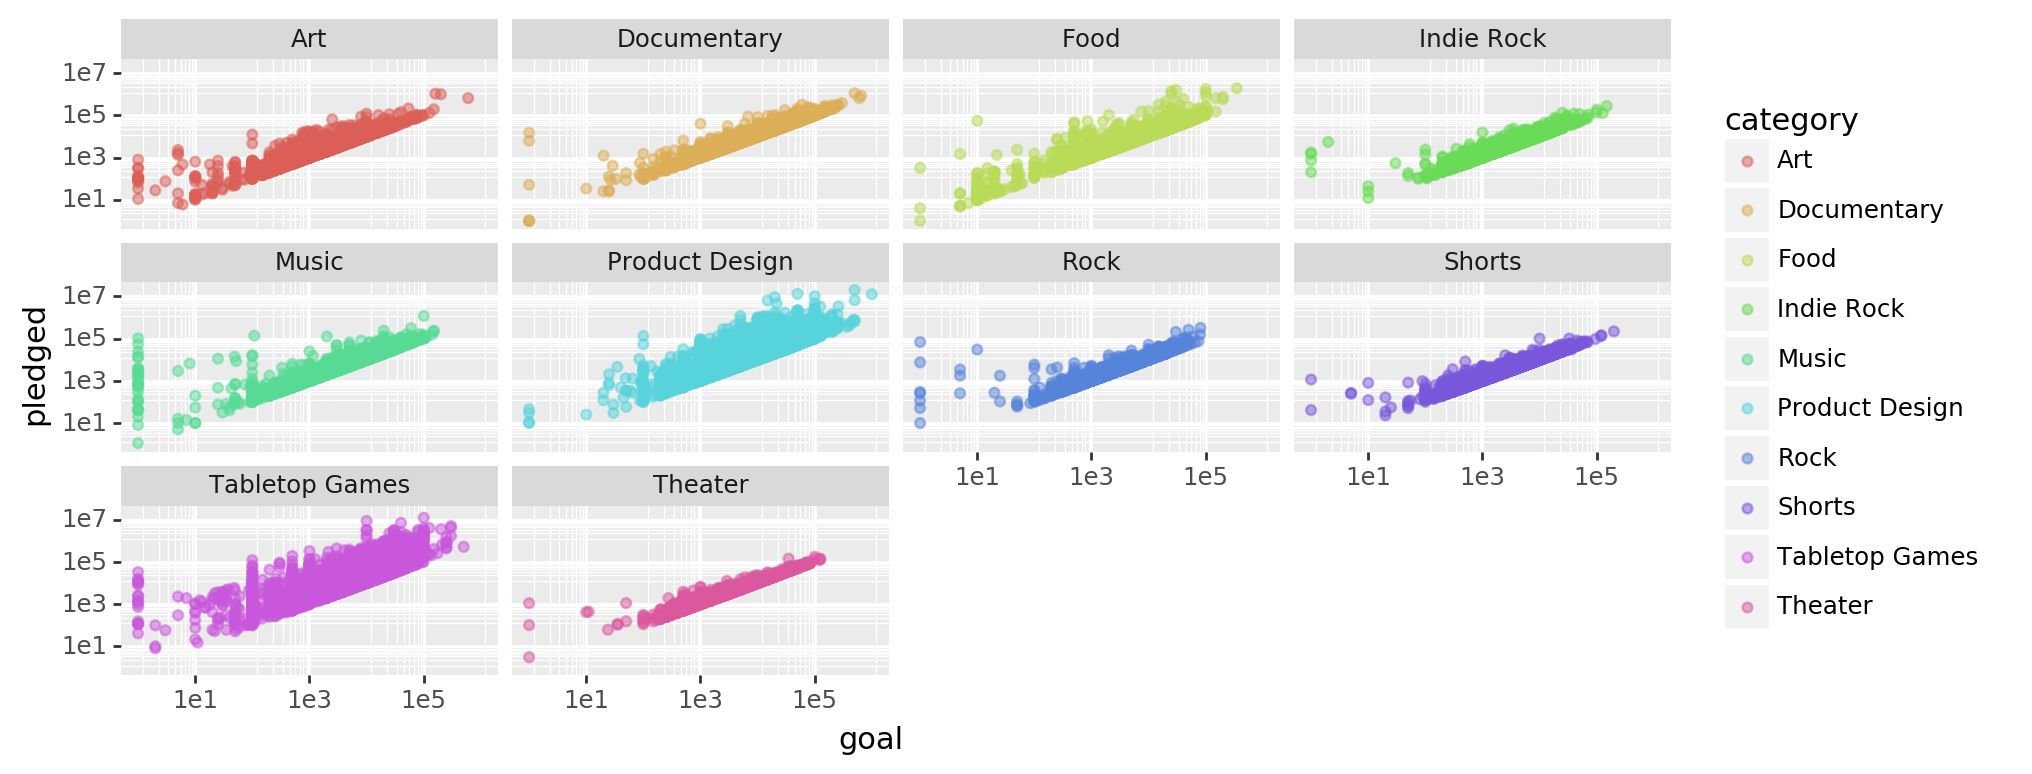

<ggplot: (8759447678561)>

In [26]:
(ggplot(Successful.query("category in @Top10Categories"), # the prefix @ tells pandas that what follows is a variable
       aes(x='goal', y='pledged', color='category')) +
    geom_point(alpha=.5) + facet_wrap('~category') +
    scale_x_log10() + scale_y_log10()
)

The large number of points well above the diagonal indicates that Product Design projects, Tabletop Games and Food projects tend to more often get more money then their goals. 

The layout strategy in the charts above is called small multiples. A scatterplot matrix is a type of small multiples where each chart contains a subset defined by two categories, for instance: (State=Successful, Category=Product Design). We can easily draw a scatterplot matrix in ggplot with the `facet_grid` operator, which takes a string that specifies two categorical variables (x and y) in the form `'variable1 ~ variable2'`. We will visualize the relation between goal and pledged for each state in each category. 20 charts (10 categories x 2 states) is too much for this notebook, so we will reduce the scope to the 5 most popular categories:

In [27]:
Top5Categories = set(map(lambda x: x[0],
                     Counter(Successful['category'].values).most_common(5)))
(ggplot(Successful.query("category in @Top5Categories"), # the prefix @ tells pandas that what follows is a variable
       aes(x='goal', y='pledged', color='category')) +
    geom_point(alpha=.4) + facet_grid('deadline_year~category') +
    scale_x_log10() + scale_y_log10() + theme(figure_size =(10, 10))
)

PlotnineError: 'At least one layer must contain all variables used for facetting'

### Task 2. Small Multiples

1. Do failed projects usually aim for a higher sum of money? Use small multiples to compare the distribution of project goals for successful and failed projects in each top 5 category. Suggestion: filter the data by category and state as done previously, map color to state, then define a facet_wrap on category.
2. What is the time distribution for each main category? Are there any spikes or trends? For instance, is the number of comics projects increasing or decreasing?

Write a paragraph summarizing your findings.